# Introduction

The purpose of this work is to valuate the Argentine derivative over the GDP called "Cupon PBI" or "GDP Coupon" in Argentine Pesos (ARS), which ticker is TVPP. In doing so, diferent ARIMA models are estimated and the one explaining the data the best is used to perform a Monte Carlo simulation over 5,000 paths.
The conditions under the TVPP coupon is paid are the following:

- The observed real GDP must be higher than the base GDP estimated in the prospectus
- The growth rate of the observed real GDP must be higher than the growth rate of the base GDP
- The accumulated payments cannot be higher USD 0.48 per unit.

Once the above conditions are met, the Government will pay 5% of the difference between the observed GDP and the base GDP, in nominal terms.


The derivative will be valid until 2034, if the condition number 3 is not met first.

# The Data

The data was linked from two sources, the first one with base 2004 was downloaded from the website 'datos.gob.ar', the data can be accessed through this link: https://datos.gob.ar/dataset/sspm-producto-interno-bruto-dolares-producto-interno-bruto-per-capita-poblacion/archivo/sspm_9.1. The second one had data since 1980 and base 1993=100 and was downloaded from Argentina's National Institute of Statistics and Census (INDEC) from the following link: https://www.indec.gob.ar/ftp/nuevaweb/cuadros/17/pbi_80-05_cuadro1.xls. The linkage was made in excel and saved as a csv file.

Let us import the libraries we will need for this project.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, style
import seaborn as sns
%matplotlib inline
style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('PBI_serie_empalmada_1993=100.csv')

In [4]:
df.head()

,indice_tiempo,pib_precios_corrientes,pib_precios_2004,pib_precios_1993,tcn_pesos_dolares,pib_dolares_precios_corrientes,poblacion,pib_per_capita_pesos_corrientes,pib_per_capita_dolares_corrientes,indice_precios_constantes_2004,indice_precios_constantes_1993,Indice Empalme 1993=100,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1/1/80,NaN,NaN,187686.5832,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN
1,4/1/80,NaN,NaN,199784.1738,NaN,NaN,NaN,NaN,NaN,NaN,106.445634,NaN,NaN,NaN,NaN,NaN
2,7/1/80,NaN,NaN,208156.4913,NaN,NaN,NaN,NaN,NaN,NaN,110.906431,NaN,NaN,NaN,NaN,NaN
3,10/1/80,NaN,NaN,208060.4187,NaN,NaN,NaN,NaN,NaN,NaN,110.855244,NaN,NaN,NaN,NaN,NaN
4,1/1/81,NaN,NaN,185177.7369,NaN,NaN,NaN,NaN,NaN,NaN,98.663279,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   indice_tiempo                      169 non-null    object 
 1   pib_precios_corrientes             73 non-null     float64
 2   pib_precios_2004                   73 non-null     float64
 3   pib_precios_1993                   169 non-null    float64
 4   tcn_pesos_dolares                  73 non-null     float64
 5   pib_dolares_precios_corrientes     73 non-null     float64
 6   poblacion                          73 non-null     float64
 7   pib_per_capita_pesos_corrientes    73 non-null     float64
 8   pib_per_capita_dolares_corrientes  73 non-null     float64
 9   indice_precios_constantes_2004     73 non-null     float64
 10  indice_precios_constantes_1993     104 non-null    float64
 11  Indice Empalme 1993=100            0 non-null      float64

In [6]:
df['indice_tiempo'] = pd.to_datetime(df.indice_tiempo)

In [7]:
df2 = df[['indice_tiempo', 'pib_precios_1993']]

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   indice_tiempo     169 non-null    datetime64[ns]
 1   pib_precios_1993  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [9]:
df.set_index('indice_tiempo', inplace=True)

In [10]:
df.head()

,pib_precios_corrientes,pib_precios_2004,pib_precios_1993,tcn_pesos_dolares,pib_dolares_precios_corrientes,poblacion,pib_per_capita_pesos_corrientes,pib_per_capita_dolares_corrientes,indice_precios_constantes_2004,indice_precios_constantes_1993,Indice Empalme 1993=100,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
indice_tiempo,,,,,,,,,,,,,,,
1980-01-01,NaN,NaN,187686.5832,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN
1980-04-01,NaN,NaN,199784.1738,NaN,NaN,NaN,NaN,NaN,NaN,106.445634,NaN,NaN,NaN,NaN,NaN
1980-07-01,NaN,NaN,208156.4913,NaN,NaN,NaN,NaN,NaN,NaN,110.906431,NaN,NaN,NaN,NaN,NaN
1980-10-01,NaN,NaN,208060.4187,NaN,NaN,NaN,NaN,NaN,NaN,110.855244,NaN,NaN,NaN,NaN,NaN
1981-01-01,NaN,NaN,185177.7369,NaN,NaN,NaN,NaN,NaN,NaN,98.663279,NaN,NaN,NaN,NaN,NaN


In [11]:
ts= df.pib_precios_1993

In [12]:
ts

indice_tiempo
1980-01-01    187686.5832
1980-04-01    199784.1738
1980-07-01    208156.4913
1980-10-01    208060.4187
1981-01-01    185177.7369
                 ...     
2021-01-01    399767.2957
2021-04-01    440371.1499
2021-07-01    420727.9058
2021-10-01    428005.6034
2022-01-01    423713.6850
Name: pib_precios_1993, Length: 169, dtype: float64

## Check Pattern in Data

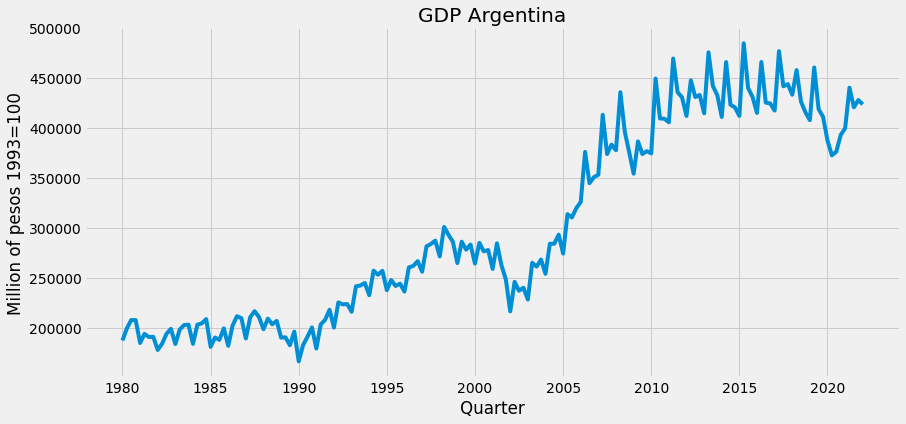

In [13]:
plt.figure(figsize=(13,6))
plt.plot(ts)
plt.xlabel('Quarter')
plt.ylabel('Million of pesos 1993=100')
plt.title('GDP Argentina')
plt.show()

## Stacked time plot

In [14]:
data = df['pib_precios_1993'].reset_index()

In [15]:
data.head()

,indice_tiempo,pib_precios_1993
0,1980-01-01,187686.5832
1,1980-04-01,199784.1738
2,1980-07-01,208156.4913
3,1980-10-01,208060.4187
4,1981-01-01,185177.7369


In [16]:
data['Quarter_GDP'] = data.indice_tiempo.dt.quarter
data['Year_GDP'] = data.indice_tiempo.dt.year

In [17]:
data.head()

,indice_tiempo,pib_precios_1993,Quarter_GDP,Year_GDP
0,1980-01-01,187686.5832,1,1980
1,1980-04-01,199784.1738,2,1980
2,1980-07-01,208156.4913,3,1980
3,1980-10-01,208060.4187,4,1980
4,1981-01-01,185177.7369,1,1981


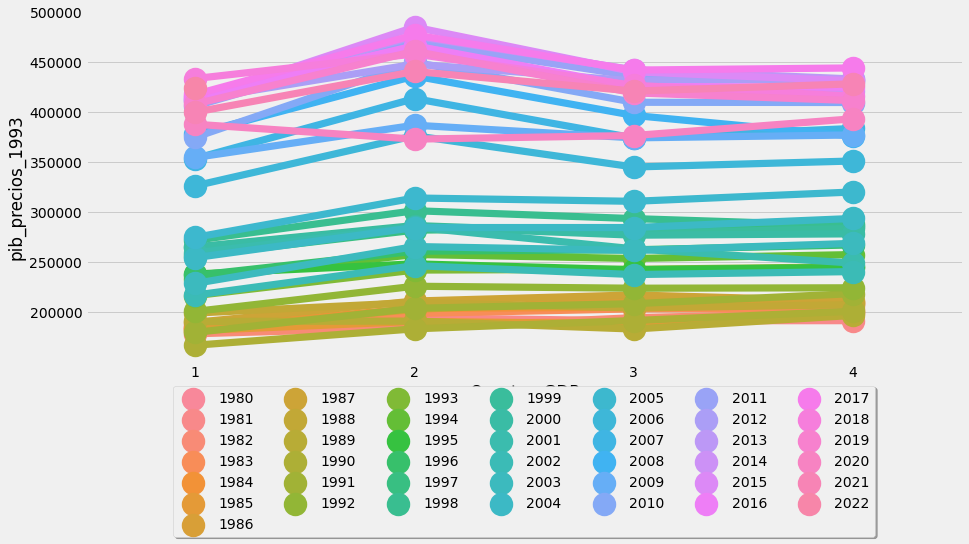

In [18]:
plt.figure(figsize=(14,6))
sns.pointplot(data=data, x='Quarter_GDP', y='pib_precios_1993', hue='Year_GDP')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=7)
plt.show()

### Box plot

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   indice_tiempo     169 non-null    datetime64[ns]
 1   pib_precios_1993  169 non-null    float64       
 2   Quarter_GDP       169 non-null    int64         
 3   Year_GDP          169 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.4 KB


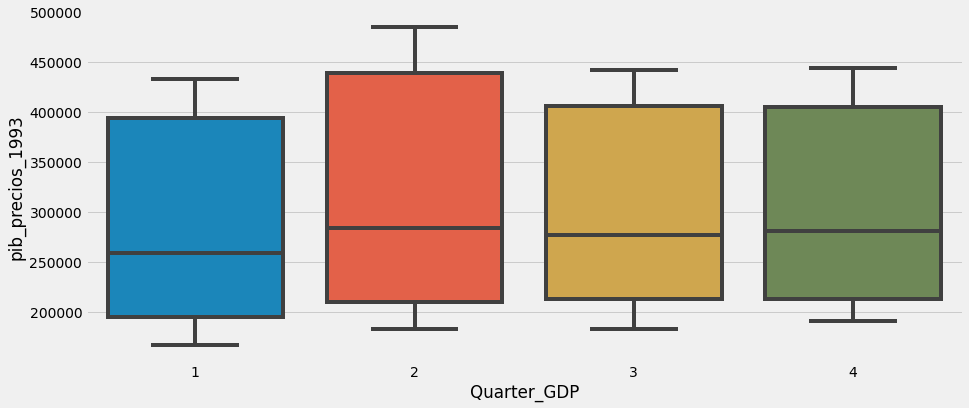

In [20]:
plt.figure(figsize=(14,6))
sns.boxplot(data=data, x='Quarter_GDP', y='pib_precios_1993')
plt.show()

A series is termed as Stationary if it has:
- Constant mean 
- Constant Variance
- Constant Covariance

In [21]:
# Graphical Method
rollingMean = ts.rolling(12).mean()
rollingStd = ts.rolling(12).std()

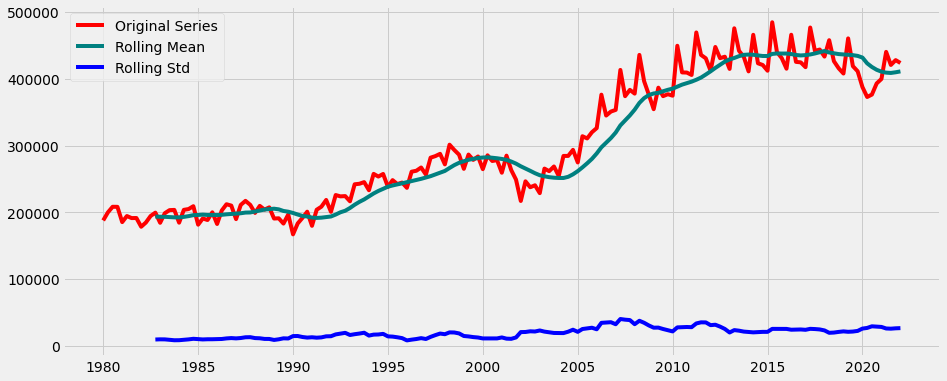

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Original Series', color='red')
plt.plot(rollingMean, label='Rolling Mean', color='teal')
plt.plot(rollingStd, label='Rolling Std', color='blue')
plt.legend()
plt.show()

Based on the above plot we can conclude that the Series is not stationary.

## Hypothesis Testing 
### Augmented Dickey Fuller Test

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
result = adfuller(ts)

In [26]:
result

(-0.8319153170458129,
 0.8095669845256717,
 8,
 160,
 {'1%': -3.4718957209472654,
  '5%': -2.8797795410156253,
  '10%': -2.5764947265625},
 3339.5070375261603)

In [27]:
# Define a function to check stationarity
def CheckStationarity(ts):
    # Graphical Method
    rollingMean = ts.rolling(12).mean()
    rollingStd = ts.rolling(12).std()
    plt.figure(figsize=(14, 6))
    plt.plot(ts, label='Original Series', color='red')
    plt.plot(rollingMean, label='Rolling Mean', color='teal')
    plt.plot(rollingStd, label='Rolling Std', color='blue')
    plt.legend()
    plt.show()
    
    result=adfuller(ts.dropna())
    print("P-Value: ",result[1])

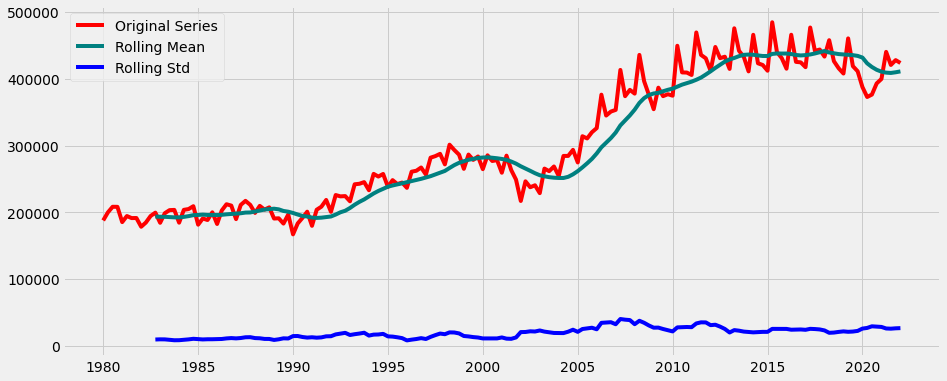

P-Value:  0.8095669845256717


In [28]:
CheckStationarity(ts)

The result of the Augmented Dickey-Fuller test shows that the null hypothesis cannot be rejected at a 5% confidence level, therefore we cannot conclude that the series is stationary, i.e, the series has a unit root.

## How to deal with non-stationary series:
- Differencing
- Decomposition
- Transformation

### Differencing

In [29]:
ts.diff(1)

indice_tiempo
1980-01-01           NaN
1980-04-01    12097.5906
1980-07-01     8372.3175
1980-10-01      -96.0726
1981-01-01   -22882.6818
                 ...    
2021-01-01     6679.4552
2021-04-01    40603.8542
2021-07-01   -19643.2441
2021-10-01     7277.6976
2022-01-01    -4291.9184
Name: pib_precios_1993, Length: 169, dtype: float64

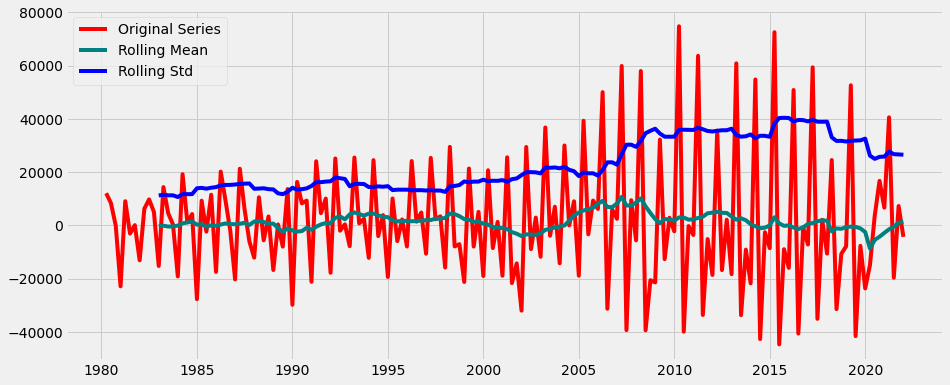

P-Value:  0.007565064865876184


In [30]:
CheckStationarity(ts.diff(1))

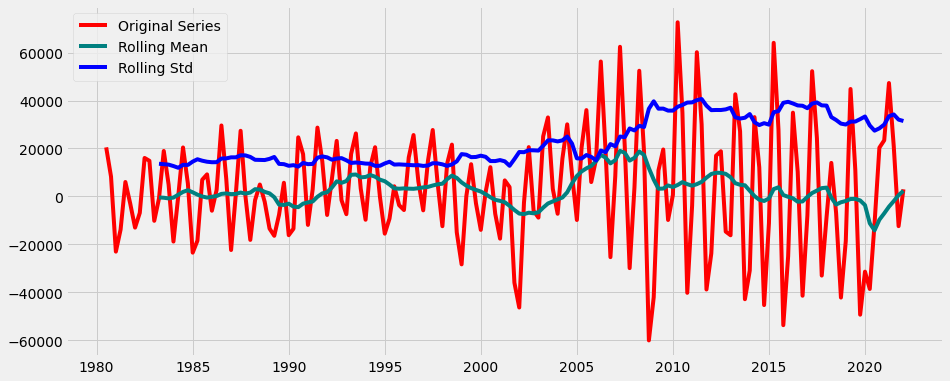

P-Value:  0.002869634117773899


In [31]:
CheckStationarity(ts.diff(2))

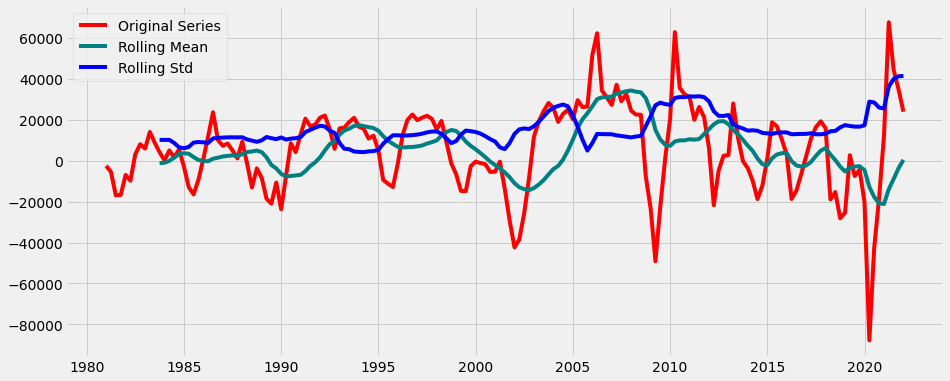

P-Value:  0.007011887275938637


In [32]:
CheckStationarity(ts.diff(4))

### Decomposition

The data can be decomposed in three components:
- Trend
- Seasonal
- Residual

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
decomposed = seasonal_decompose(ts)

In [35]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

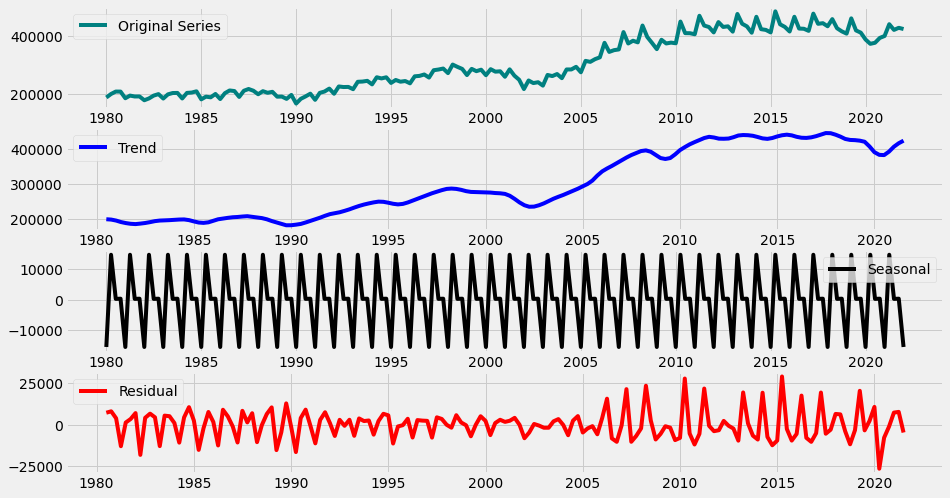

In [36]:
plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
plt.plot(ts, label='Original Series', color='teal')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='blue')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='black')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.legend()
plt.show()

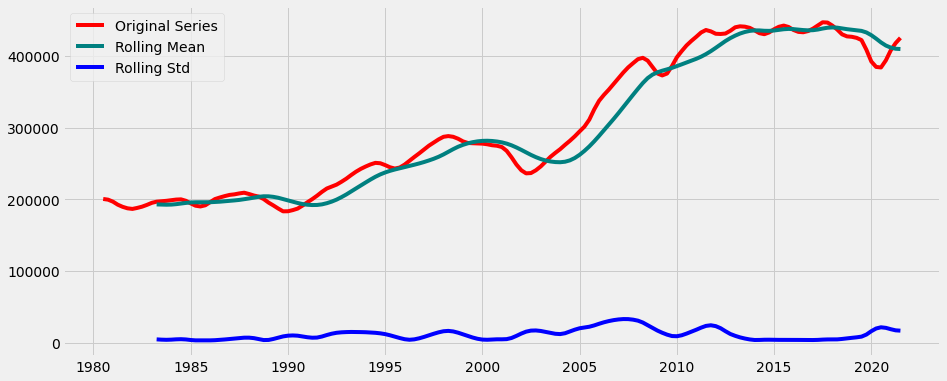

P-Value:  0.8881823958914856


In [37]:
CheckStationarity(trend)

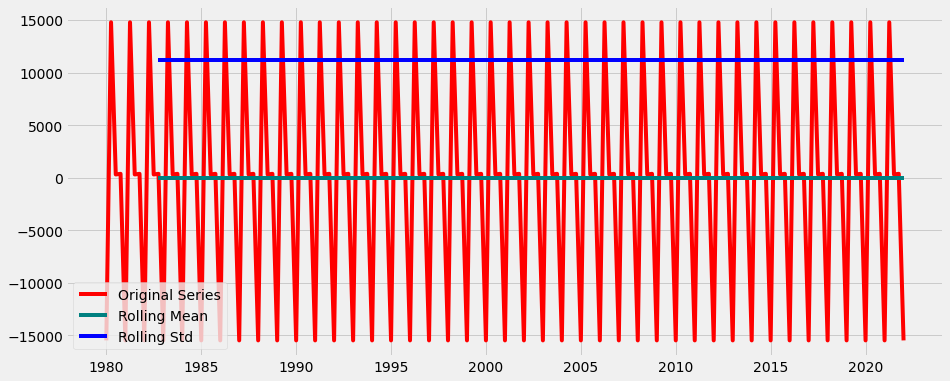

P-Value:  0.0


In [38]:
CheckStationarity(seasonal)

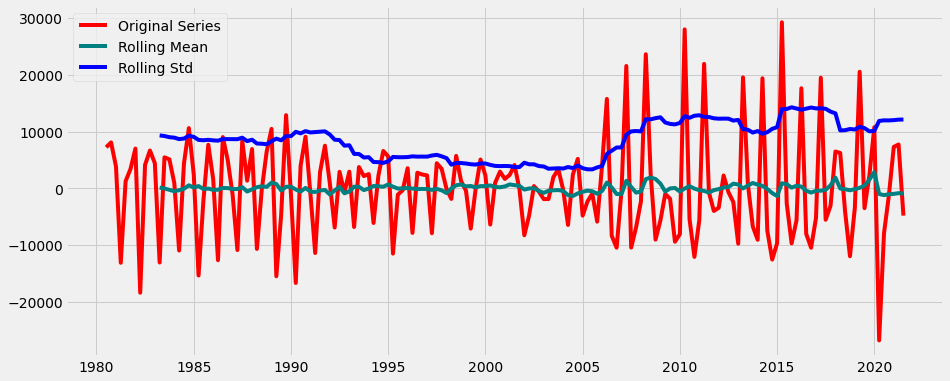

P-Value:  2.0358228214359828e-07


In [39]:
CheckStationarity(residual)

From the above we can conclude that the residuals and the seasonal components of the series are stationary, however, the trend is not.

### Transformation

We have already decomposed the data and concluded that the seasonal and residual components are stationary, however, for the sake of completeness we will check the stationarity of transformation. For that purpose, we check the stationarity of the Log and DLog of the series.

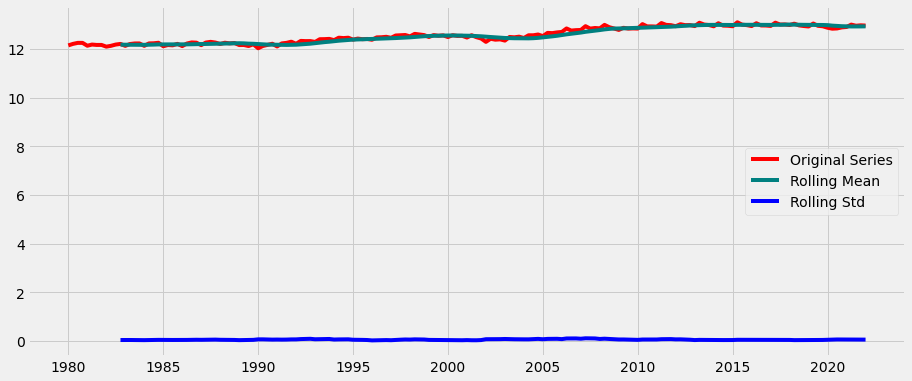

P-Value:  0.8221933074334438


In [40]:
CheckStationarity(np.log(ts))

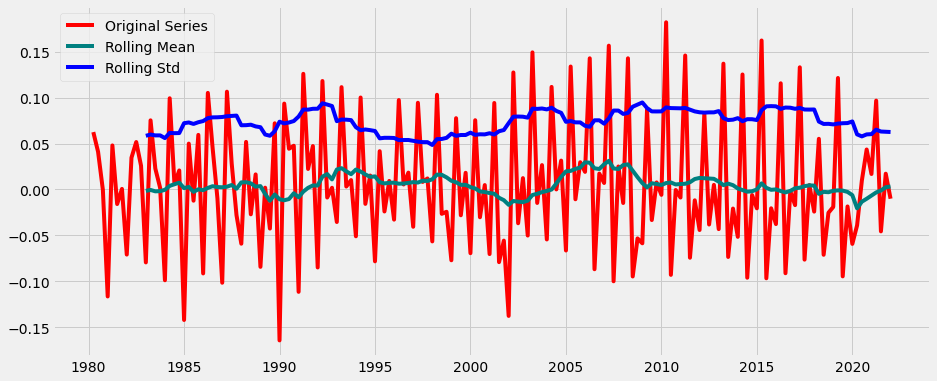

P-Value:  0.011219776724856105


In [41]:
CheckStationarity(np.log(ts).diff(1))

We conclude that the Log is not stationary. DLog is stationary at 5%  but not at 1%.

### Box-Jenkins

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

<Figure size 720x432 with 0 Axes>

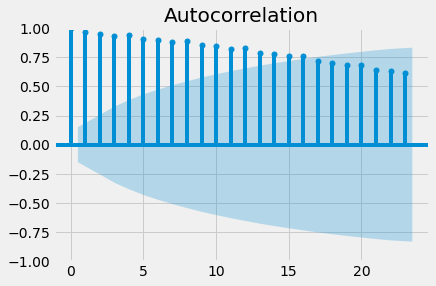

In [43]:
plt.figure(figsize=(10,6))
plot_acf(ts) # helps to identify the previous error in the MA model
plt.show()

From here we identify lags 1-16 as good candidates for the MA model.

<Figure size 720x432 with 0 Axes>

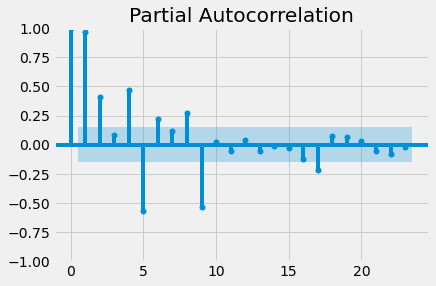

In [44]:
plt.figure(figsize=(10,6))
plot_pacf(ts) # helps to identify the previos lags in the AR model
plt.show()

From this chart we identify lags up to 16 as good candidates for the AR model

In [45]:
pacf(ts)

array([ 1.        ,  0.96763329,  0.41150883,  0.08150414,  0.47183885,
       -0.5660022 ,  0.2175796 ,  0.11295145,  0.27521913, -0.53354537,
        0.02670093, -0.0502789 ,  0.0397802 , -0.05361976, -0.01120939,
       -0.03250574, -0.12564314, -0.2142922 ,  0.07359579,  0.06960183,
        0.0301398 , -0.05419396, -0.08083496])

In [46]:
pacf(ts.diff(1).dropna())

array([ 1.        , -0.46640465, -0.10884673, -0.59048518,  0.65322994,
       -0.28243695, -0.11162597, -0.16604302,  0.4764181 , -0.24119347,
        0.01172456, -0.19375025,  0.26388184, -0.15053964,  0.00551428,
       -0.08272622,  0.23163287, -0.14944092, -0.01707055,  0.02337776,
       -0.16430702,  0.07606009, -0.16382309])

In [47]:
pacf(seasonal.diff(1).dropna())

array([ 1.        , -0.66362525, -0.18666546, -0.98442417,  1.00689427,
       37.39729646, -1.00726262, -2.78593919,  1.00370816, 36.52816623,
       -1.00390574, -4.40310547,  1.00266897, 35.6050022 , -1.00281129,
       -5.84951951,  1.00216504, 34.65877023, -1.00228089, -7.13713043,
        1.00187636, 33.69512316, -1.00197738])

# The ARIMA Model

In [48]:
from statsmodels.tsa.arima.model import ARIMA

First, we try the I(1) model with 16 lags for both AR and MA.

In [49]:
model = ARIMA(ts, order=(16, 1, 16))

/Users/carlosabiganem/opt/anaconda3/envs/ThesisMfin/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/carlosabiganem/opt/anaconda3/envs/ThesisMfin/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/carlosabiganem/opt/anaconda3/envs/ThesisMfin/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [50]:
modelResult=model.fit()

/Users/carlosabiganem/opt/anaconda3/envs/ThesisMfin/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
print(modelResult.summary())

                               SARIMAX Results                                
Dep. Variable:       pib_precios_1993   No. Observations:                  169
Model:               ARIMA(16, 1, 16)   Log Likelihood               -1850.260
Date:                Fri, 16 Sep 2022   AIC                           3766.520
Time:                        10:26:21   BIC                           3869.611
Sample:                    01-01-1980   HQIC                          3808.359
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0649      0.238     -0.273      0.785      -0.531       0.401
ar.L2          0.1064      0.230      0.463      0.643      -0.344       0.557
ar.L3         -0.2782      0.235     -1.184      0.2

Next, we try the DLog model.

In [52]:
model2 = ARIMA(np.log(ts), order=(16, 1, 16))

/Users/carlosabiganem/opt/anaconda3/envs/ThesisMfin/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/carlosabiganem/opt/anaconda3/envs/ThesisMfin/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/carlosabiganem/opt/anaconda3/envs/ThesisMfin/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [53]:
modelResult2=model2.fit()

/Users/carlosabiganem/opt/anaconda3/envs/ThesisMfin/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
print(modelResult2.summary())

                               SARIMAX Results                                
Dep. Variable:       pib_precios_1993   No. Observations:                  169
Model:               ARIMA(16, 1, 16)   Log Likelihood                 336.812
Date:                Fri, 16 Sep 2022   AIC                           -607.625
Time:                        10:26:24   BIC                           -504.534
Sample:                    01-01-1980   HQIC                          -565.785
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2967      1.783      0.166      0.868      -3.198       3.792
ar.L2          0.2522      1.287      0.196      0.845      -2.270       2.775
ar.L3          0.1919      1.180      0.163      0.8

From the results of the AIC and BIC above we conclude that the model ARIMA(16, 1, 16) is the appropriate model.

# Forecasting & Monte-Carlo Simulations

In [55]:
modelResult.forecast(steps=52)

2022-04-01    444112.342514
2022-07-01    424755.044803
2022-10-01    417851.488839
2023-01-01    426897.608988
2023-04-01    447425.315274
2023-07-01    418998.982228
2023-10-01    424949.858738
2024-01-01    431712.256484
2024-04-01    450108.751846
2024-07-01    426936.107778
2024-10-01    432634.319481
2025-01-01    439174.445220
2025-04-01    457192.522216
2025-07-01    432855.418130
2025-10-01    437664.477842
2026-01-01    435944.569167
2026-04-01    451625.669778
2026-07-01    428288.024713
2026-10-01    431016.031659
2027-01-01    443893.212134
2027-04-01    456350.820800
2027-07-01    432355.323516
2027-10-01    440727.138639
2028-01-01    450111.060642
2028-04-01    460094.381146
2028-07-01    439426.560919
2028-10-01    446055.310226
2029-01-01    453740.358240
2029-04-01    458983.571824
2029-07-01    439596.895176
2029-10-01    446033.514890
2030-01-01    449644.587528
2030-04-01    458529.134818
2030-07-01    437809.748934
2030-10-01    446987.151976
2031-01-01    460118

In [56]:
ts

indice_tiempo
1980-01-01    187686.5832
1980-04-01    199784.1738
1980-07-01    208156.4913
1980-10-01    208060.4187
1981-01-01    185177.7369
                 ...     
2021-01-01    399767.2957
2021-04-01    440371.1499
2021-07-01    420727.9058
2021-10-01    428005.6034
2022-01-01    423713.6850
Name: pib_precios_1993, Length: 169, dtype: float64

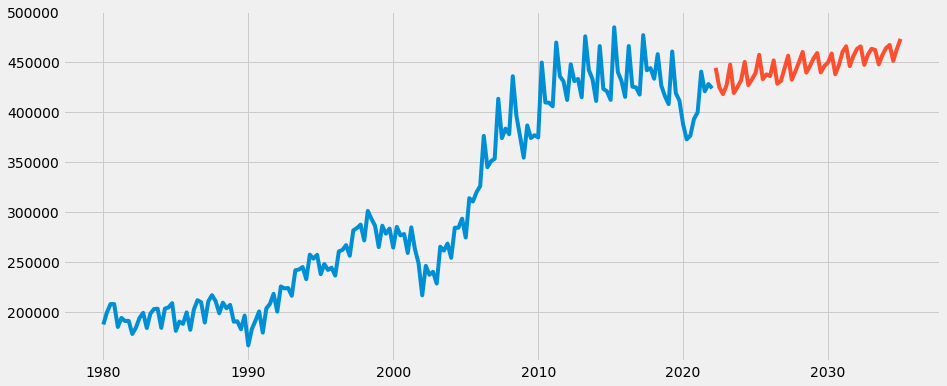

In [57]:
plt.figure(figsize=(14, 6))
plt.plot(ts)
plt.plot(modelResult.forecast(steps=52))
plt.show()

In [58]:
sim = modelResult.simulate(52, anchor='end', repetitions=5000)

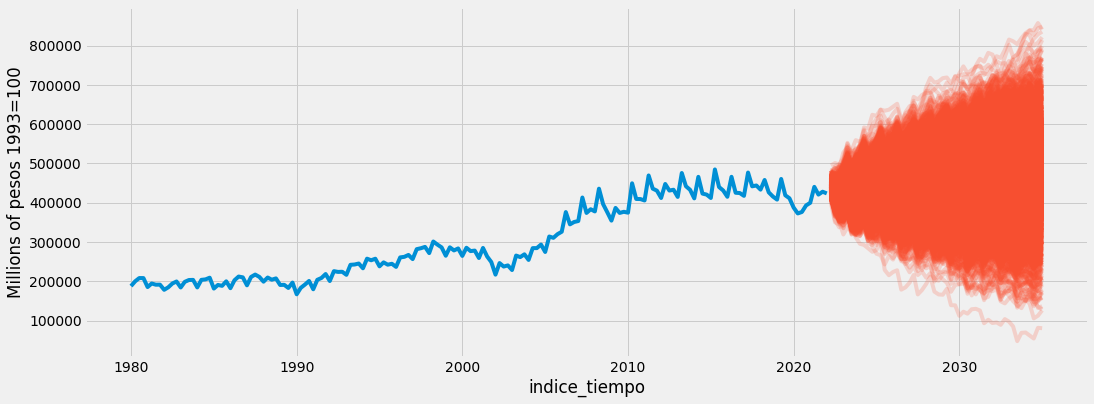

In [59]:
# Plot the data and simulations
plt.figure(figsize=(16, 6))
plt.plot(ts, color='C0')
plt.plot(sim, color='C1' ,alpha=0.2)
plt.xlabel('indice_tiempo')
plt.ylabel('Millions of pesos 1993=100')
plt.show()

# Conditions of the GDP-linked securities

According to the pages S-25 - S-28 of the prospectus, Argentina will make a payment on GDP-linked Securities in respect of any given reference year only if the following three conditions are met:
- for the reference year, Actual Real GDP exceeds Base Case GDP;
- for the reference year, annual growth in Actual Real GDP exceeds the growth rate in Base Case GDP for such year (for your reference, the Base Case GDP for 2004 is Ps.275,276.01 million, measured in 1993 pesos); and
- total payments made on a GDP-linked Security do not exceed the payment cap for that GDP-linked Security.

## First Condition: Actual Real GDP vs Base Case GDP

The base case GDP is defined in the prospectus as the table below:

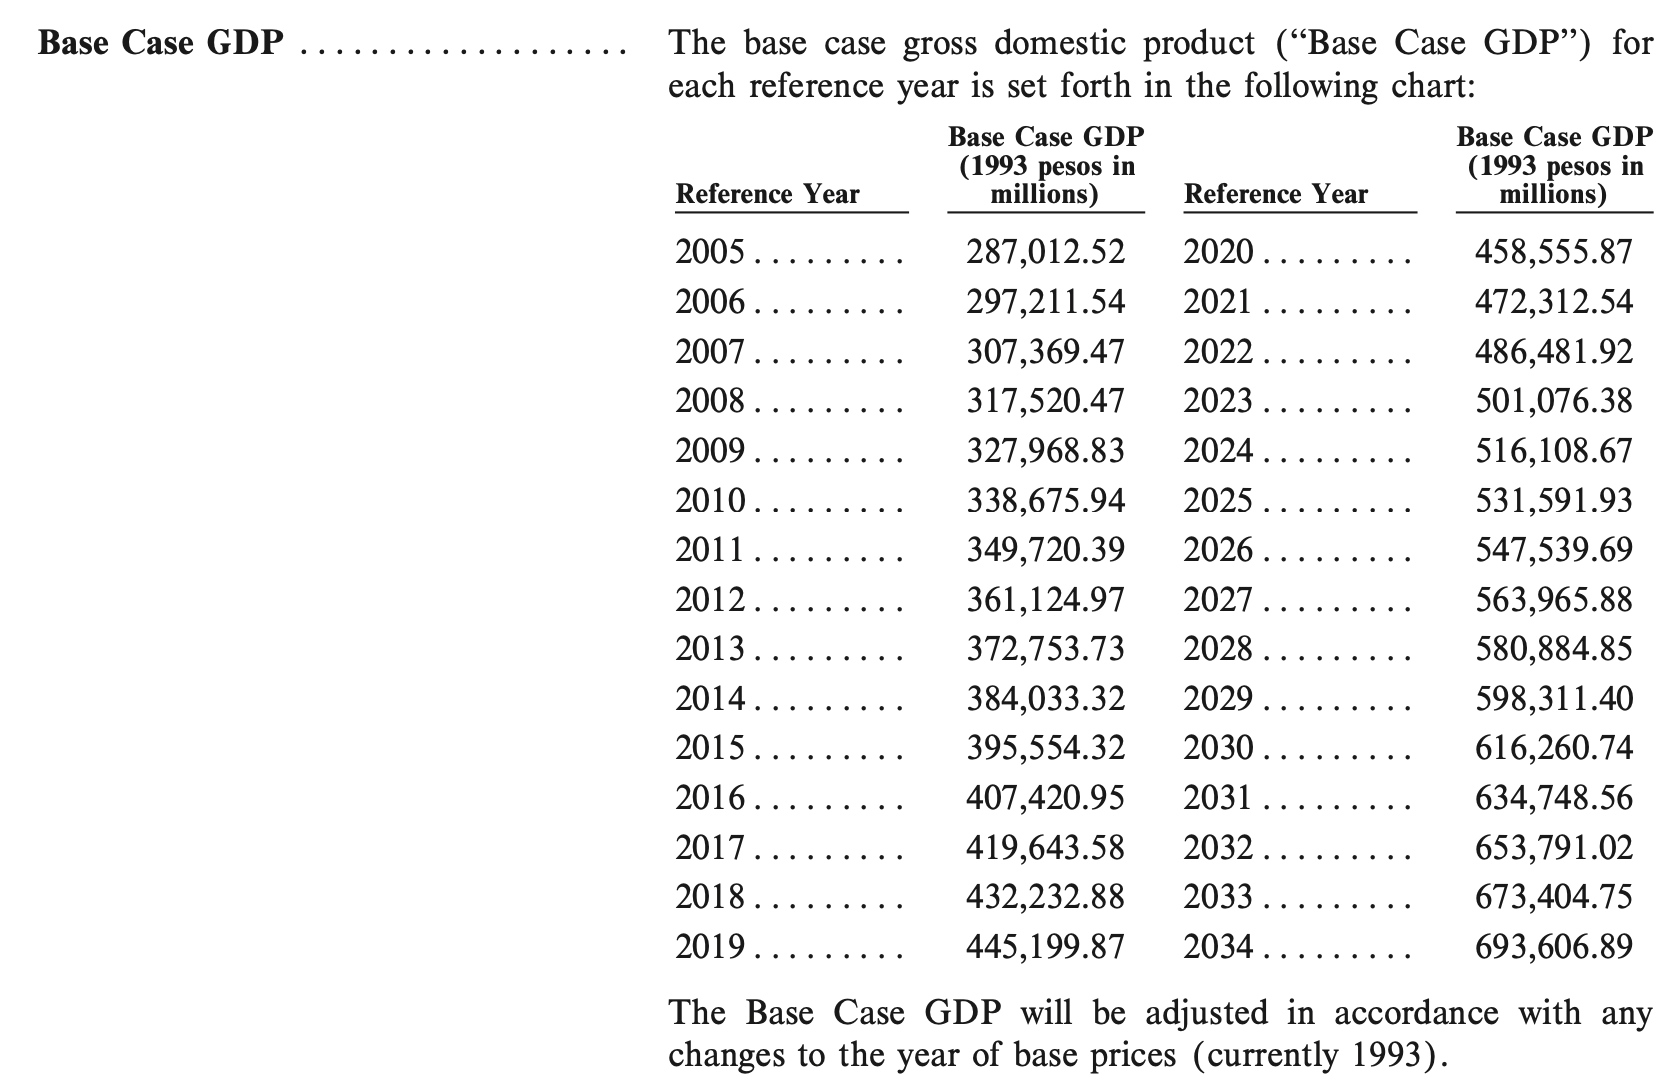

In [60]:
GDP_base = {'Year': np.arange(2004,2035),
           'Base_GDP_pesos_million_1993': [275276.01, 287012.52, 297211.54,
                                           307369.47, 317520.47, 327968.83,
                                           338675.94, 349720.39, 361124.97,
                                           372753.73, 384033.32, 395554.32,
                                           407420.95, 419643.58, 432643.58,
                                           445199.87, 458555.87, 472312.54,
                                           486481.92, 501076.38, 516108.67, 
                                           531591.93, 547539.69, 563965.88, 
                                           580884.85, 598311.40, 616260.74,
                                           634748.56, 653791.02, 673404.75, 
                                           693606.89
                                          ]}
base_case_GDP = pd.DataFrame(GDP_base, index=GDP_base['Year'])

In [61]:
base_case_GDP.drop(columns='Year', inplace=True)

In [62]:
base_case_GDP['Year'] = pd.to_datetime(base_case_GDP.index, format='%Y').year
base_case_GDP.set_index('Year', inplace=True)

In [63]:
base_case_GDP

,Base_GDP_pesos_million_1993
Year,
2004,275276.01
2005,287012.52
2006,297211.54
2007,307369.47
2008,317520.47
2009,327968.83
2010,338675.94
2011,349720.39
2012,361124.97


The actual real gross domestic product ('Actual Real GDP') is defined in the prospectus as the gross domestic product of Argentina in constant pesos for each calendar year as published by the Instituto Nacional de Estadπstica y Censos ('INDEC').

The INDEC currently uses base 2004 for the calculation of the GDP, and the prospectus clarifies the kind of adjustment to be made to the base case if the basis changes. However, since we converted the Actual Real GDP data to base 1993=100, we don't have to make any adjustments to the base case.

We now take the actual GDP and the simulated GDP in a yearly basis:

In [64]:
GDP_constant_prices_1993 = ts
GDP_constant_prices_1993 = pd.DataFrame(ts[ts.index.quarter == 4])

In [65]:
new_index = pd.to_datetime(GDP_constant_prices_1993.index, format='%Y').year
GDP_constant_prices_1993.set_index(new_index, inplace=True)
GDP_constant_prices_1993

,pib_precios_1993
indice_tiempo,
1980,208060.4187
1981,191319.8214
1982,199367.4608
1983,203477.3512
1984,209028.6192
1985,199824.2299
1986,209928.4740
1987,211031.8881
1988,207282.4191


In [66]:
yearly_sim = sim[sim.index.quarter == 4]
yearly_sim['Year'] = yearly_sim.index.year
yearly_sim.set_index('Year', inplace=True)
yearly_sim.columns = yearly_sim.columns.droplevel()
yearly_sim

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,381510.613735,428966.964657,390155.993286,453505.465596,383896.148019,433471.513785,445955.881796,416367.428370,454277.330334,377807.383595,...,390178.201939,421905.884281,435871.187544,435140.117620,398127.333656,414905.693778,418404.732448,387191.138318,389504.122901,422545.893362
2023,406991.001210,448408.254570,405699.928261,478164.979212,401771.643048,458652.937044,441371.648275,403451.218603,502818.496549,367958.941271,...,329487.977661,476544.793693,430142.316695,416062.283343,357190.906841,472115.587607,439751.571729,380499.204525,448085.229068,463173.566890
2024,432330.622455,442255.298082,371363.588073,564485.055605,419596.454600,453306.259547,459182.103486,422261.950313,508856.800274,385922.716224,...,327849.989301,484620.763536,360925.808503,416613.610360,384466.345305,490221.490477,411431.900519,426073.902377,434577.990581,504432.277595
2025,444486.970520,464831.990934,333634.198823,587695.960127,446322.112538,460988.271312,435133.395218,402199.212686,517196.344173,424917.018474,...,315396.477553,470164.381485,341417.032787,485240.849474,417411.040171,490229.950127,410179.456593,426082.558966,442050.760282,549859.496621
2026,444909.156994,418995.538019,314957.185556,600759.006338,430923.958905,452355.349941,416825.402541,387505.031150,498441.204884,388030.951318,...,338543.399045,471225.561027,325695.329145,444303.104566,363473.919271,463819.991921,417670.039891,470646.202243,425388.502228,541985.401311
2027,453279.815173,466272.891412,324588.865285,607867.458017,429885.187260,482894.185546,448169.753265,375375.683327,520377.986207,386974.543473,...,357035.156047,466674.833864,340676.560253,426166.191962,354291.282269,458159.733522,422867.788038,496055.331973,423879.816835,573284.051293
2028,462405.103120,497761.127795,294111.070456,620899.243031,436129.603861,467909.080651,445773.214878,361595.025250,508132.849535,386805.740247,...,409370.531786,490119.579226,347892.112383,452026.666500,360270.745248,454678.679072,458350.381197,470070.281755,449366.597935,614615.003076
2029,447834.687618,463358.610442,307891.892960,651770.721862,431608.201808,471425.322691,416187.884139,369000.409027,504870.285068,396313.979747,...,414870.534574,494774.698674,384870.293990,476915.974924,353505.286051,451607.285984,457568.321499,484657.991748,445826.563462,598761.252500
2030,441803.750073,465126.996643,317762.416004,623755.006689,441476.849548,483296.416142,422745.712006,315650.303015,514268.348365,364152.025293,...,438283.985610,479816.055108,366923.667587,516439.289692,349410.123567,487408.499912,427564.624817,509169.869863,440740.289987,609535.359352


In [67]:
projected_base_case = base_case_GDP[base_case_GDP.index >=2022]
projected_base_case = projected_base_case.iloc[:, 0]

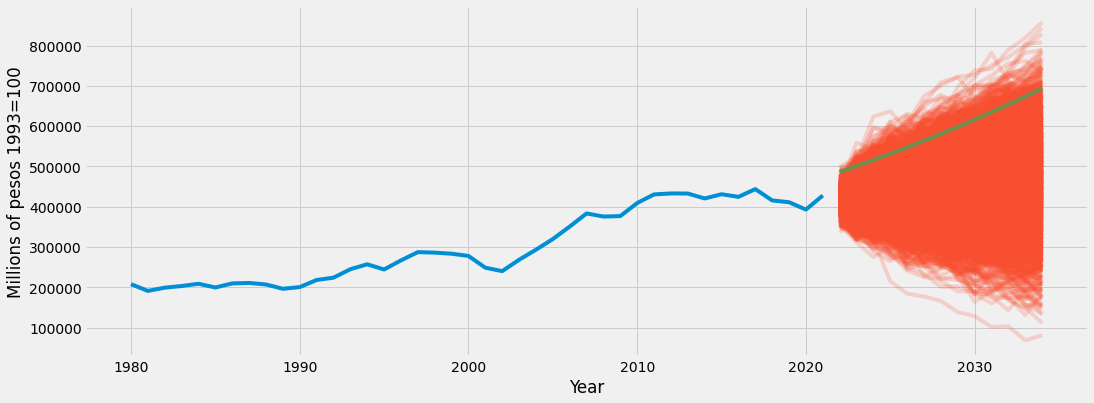

In [68]:
# Plot the data and simulations
plt.figure(figsize=(16, 6))
plt.plot(GDP_constant_prices_1993, color='C0')
plt.plot(yearly_sim, color='C1' ,alpha=0.2)
plt.plot(projected_base_case, color='C3')
plt.xlabel('Year')
plt.ylabel('Millions of pesos 1993=100')
plt.show()

For the first condition, we compare the base case real GDP from 2022 onwards to the simulations of Actual Real GDP from 2022 to see which one is higher.

In [69]:
yearly_sim

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,381510.613735,428966.964657,390155.993286,453505.465596,383896.148019,433471.513785,445955.881796,416367.428370,454277.330334,377807.383595,...,390178.201939,421905.884281,435871.187544,435140.117620,398127.333656,414905.693778,418404.732448,387191.138318,389504.122901,422545.893362
2023,406991.001210,448408.254570,405699.928261,478164.979212,401771.643048,458652.937044,441371.648275,403451.218603,502818.496549,367958.941271,...,329487.977661,476544.793693,430142.316695,416062.283343,357190.906841,472115.587607,439751.571729,380499.204525,448085.229068,463173.566890
2024,432330.622455,442255.298082,371363.588073,564485.055605,419596.454600,453306.259547,459182.103486,422261.950313,508856.800274,385922.716224,...,327849.989301,484620.763536,360925.808503,416613.610360,384466.345305,490221.490477,411431.900519,426073.902377,434577.990581,504432.277595
2025,444486.970520,464831.990934,333634.198823,587695.960127,446322.112538,460988.271312,435133.395218,402199.212686,517196.344173,424917.018474,...,315396.477553,470164.381485,341417.032787,485240.849474,417411.040171,490229.950127,410179.456593,426082.558966,442050.760282,549859.496621
2026,444909.156994,418995.538019,314957.185556,600759.006338,430923.958905,452355.349941,416825.402541,387505.031150,498441.204884,388030.951318,...,338543.399045,471225.561027,325695.329145,444303.104566,363473.919271,463819.991921,417670.039891,470646.202243,425388.502228,541985.401311
2027,453279.815173,466272.891412,324588.865285,607867.458017,429885.187260,482894.185546,448169.753265,375375.683327,520377.986207,386974.543473,...,357035.156047,466674.833864,340676.560253,426166.191962,354291.282269,458159.733522,422867.788038,496055.331973,423879.816835,573284.051293
2028,462405.103120,497761.127795,294111.070456,620899.243031,436129.603861,467909.080651,445773.214878,361595.025250,508132.849535,386805.740247,...,409370.531786,490119.579226,347892.112383,452026.666500,360270.745248,454678.679072,458350.381197,470070.281755,449366.597935,614615.003076
2029,447834.687618,463358.610442,307891.892960,651770.721862,431608.201808,471425.322691,416187.884139,369000.409027,504870.285068,396313.979747,...,414870.534574,494774.698674,384870.293990,476915.974924,353505.286051,451607.285984,457568.321499,484657.991748,445826.563462,598761.252500
2030,441803.750073,465126.996643,317762.416004,623755.006689,441476.849548,483296.416142,422745.712006,315650.303015,514268.348365,364152.025293,...,438283.985610,479816.055108,366923.667587,516439.289692,349410.123567,487408.499912,427564.624817,509169.869863,440740.289987,609535.359352


In [70]:
condition_1 = pd.DataFrame()

for sim in yearly_sim.columns:
    compare = yearly_sim.iloc[:,sim] > projected_base_case
    condition_1[sim] = compare

In [89]:
yearly_sim[condition_1]

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502818.496549,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024,NaN,NaN,NaN,564485.055605,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025,NaN,NaN,NaN,587695.960127,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549859.496621
2026,NaN,NaN,NaN,600759.006338,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2027,NaN,NaN,NaN,607867.458017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,573284.051293
2028,NaN,NaN,NaN,620899.243031,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,614615.003076
2029,NaN,NaN,NaN,651770.721862,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598761.252500
2030,NaN,NaN,NaN,623755.006689,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Second Condition: annual growth of Actual Real GDP vs. annual growth of Base Case GDP

To check if this condition is met, we calculate the growth rate of both Actual Real GDP and Base Case GDP and compare them.

In [72]:
base_case_pct_change = base_case_GDP.pct_change().dropna()
proj_base_case_pct_change = base_case_pct_change.loc[2022: ,
                                                     'Base_GDP_pesos_million_1993']

We add the observed GDP value of 2021 to yearly_sim in order to calculate the percentage change for 2022 for each simulation.

In [73]:
yearly_sim.loc[2021,:] = GDP_constant_prices_1993.iloc[-1, 0]
yearly_sim.sort_index(inplace=True)

In [74]:
yearly_sim_pct_change = yearly_sim.pct_change().dropna()
yearly_sim = yearly_sim.iloc[1:, :]

In [75]:
condition_2 = pd.DataFrame()

for sim in yearly_sim.columns:
    compare = yearly_sim_pct_change.iloc[:,sim] > proj_base_case_pct_change
    condition_2[sim] = compare
    
condition_2

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,False,False,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2023,True,True,True,True,True,True,False,False,True,False,...,False,True,False,False,False,True,True,False,True,True
2024,True,False,False,True,True,False,True,True,False,True,...,False,False,False,False,True,True,False,True,False,True
2025,False,True,False,True,True,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,True
2026,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2027,False,True,True,False,False,True,True,False,True,False,...,True,False,True,False,False,False,False,True,False,True
2028,False,True,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,True,True
2029,False,False,True,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
2030,False,False,True,False,False,False,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False


In [90]:
yearly_sim[condition_1 & condition_2]

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502818.496549,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024,NaN,NaN,NaN,564485.055605,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025,NaN,NaN,NaN,587695.960127,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549859.496621
2026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,573284.051293
2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,614615.003076
2029,NaN,NaN,NaN,651770.721862,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Third Condition: total payments do not exceed the cap

According to the prospectus, the total amount to be paid during the life of the GDP-linked Securities, per unit of GDP-linked Security, will not exceed 0.48, measured per unit of currency. We refer to this amount as the ""payment cap for GDP-linked Securities.'' For example, if you receive GDP-linked Securities in a notional amount equal to USD 1 million, the payment cap for your GDP-linked Securities would equal USD 480,000.
If the payment cap for a GDP-linked Security is reached in a payment year prior to the scheduled expiration of the GDP-linked Securities, the GDP-linked Securities will be deemed to have expired in such year.
If, for any given year the aggregate payment due under a GDP- linked Security is greater than the amount remaining under the payment cap for that Security, then the remaining amount availa- ble under the payment cap for that GDP-linked Security will be distributed to the holder of that security.

The last payment made by Argentina was in 2012, and the remaining cap is 0.2459359 ARS for each ARS of the GDP-Linked Security since we are valuing the security governed by Argentine Law. Sources: https://www.argentina.gob.ar/economia/finanzas/valores-negociables-vinculados-al-pbi
https://www.argentina.gob.ar/sites/default/files/comunicado_6to_pago_unidad_pbi.pdf

In [76]:
payment_cap = 0.2459359

# Payment Amount Calculation

The Prospectus stablishes that on each payment date, holders of GDP-linked Securities will be entitled to receive payments in an amount equal to the Available Excess GDP (as deÑned below) for the corresponding reference year, multiplied by the aggregate notional amount of GDP-linked securities they hold. ""Available Excess GDP'' is an amount per unit of currency of notional amount of GDP-linked Securities, determined in accordance with the following formula:

$$Available Excess GDP = (0.05 * Excess GDP) * unit\ of\ currency\ coefficient $$

Where: 
- "Excess GDP"  is expressed in billions of nominal pesos, and
- the "unit of currency coefficient" is as set forth in the following table:

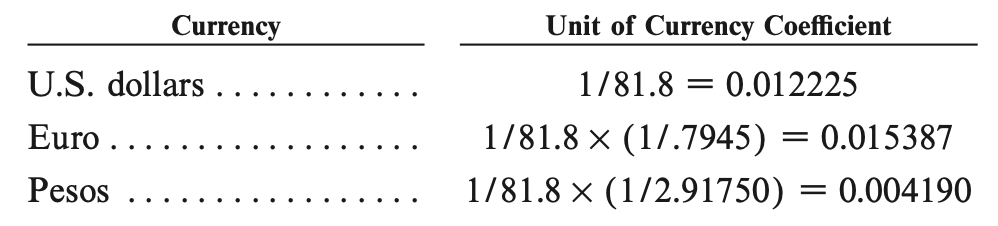

The prospectus establishes that: 
> The excess gross domestic product for any reference year ("Excess GDP") is the amount, if any, by which Actual Real GDP (converted to nominal pesos, as described below) exceeds the Base Case GDP (converted to nominal pesos, as described below). Excess GDP will be expressed in billions.

> For purposes of determining Excess GDP for any reference year, each of the Actual Real GDP and Base Case GDP for that reference year will be converted into nominal pesos by multiplying it by a fraction, the numerator of which is the GDP Deflator (as defined below) for that reference year and the denominator of which is the GDP Deflator for the year of base prices used to calculate Actual Real GDP and Base Case GDP for that reference year. As noted above, 1993 is currently the year of base prices, and the GDP Deflator for that year is one.

> The GDP deÖator for any given year (""GDP DeÖator'') is the quotient that results from dividing the Actual Nominal GDP for such year, by the Actual Real GDP for the same year, in each case as published by INDEC.

In [77]:
GDP_deflator = pd.read_csv('Data/GDP_deflator.csv')
GDP_deflator['Year'] = pd.to_datetime(GDP_deflator.Year, format='%Y')
GDP_deflator.set_index('Year', inplace=True)
GDP_deflator['Year'] = GDP_deflator.index.year
GDP_deflator.set_index('Year', inplace=True)

In [78]:
GDP_deflator = GDP_deflator[GDP_deflator.index >= 2022]
GDP_deflator = GDP_deflator.iloc[: , 0]
GDP_deflator

Year
2022      98.538215
2023     135.833081
2024     181.698859
2025     235.596407
2026     294.900194
2027     354.439982
2028     426.000740
2029     512.009478
2030     615.383217
2031     739.627918
2032     888.957386
2033    1068.436191
2034    1284.151424
Name: GDP_Deflator, dtype: float64

In [92]:
excess_GDP = pd.DataFrame()

for sim in yearly_sim.columns:
    compare = yearly_sim.iloc[:, sim]*GDP_deflator - projected_base_case * GDP_deflator
    compare = compare.where(compare > 0).fillna(0)
    excess_GDP[sim] = compare / 1000

excess_GDP

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2023,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,236.637058,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2024,0.0,0.0,0.0,8789.934062,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2025,0.0,0.0,0.0,13217.907922,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4303.773062
2026,0.0,0.0,0.0,15694.386723,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2027,0.0,0.0,0.0,15560.474522,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3302.732465
2028,0.0,0.0,0.0,17046.161034,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14369.070164
2029,0.0,0.0,0.0,27371.679497,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.328744
2030,0.0,0.0,0.0,4611.845947,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [93]:
unit_of_currency_coef = 1/81.8 * (1/2.91750)

In [94]:
available_excess_GDP = excess_GDP * .05 * unit_of_currency_coef

In [95]:
available_excess_GDP

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2023,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2024,0.0,0.0,0.0,1.841584,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2025,0.0,0.0,0.0,2.769291,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.901686
2026,0.0,0.0,0.0,3.288139,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2027,0.0,0.0,0.0,3.260083,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.691957
2028,0.0,0.0,0.0,3.571350,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.010471
2029,0.0,0.0,0.0,5.734655,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048256
2030,0.0,0.0,0.0,0.966230,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [96]:
cum_available_excess_GDP = available_excess_GDP.cumsum()

In [97]:
cum_available_excess_GDP

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2023,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2024,0.0,0.0,0.0,1.841584,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2025,0.0,0.0,0.0,4.610874,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.901686
2026,0.0,0.0,0.0,7.899014,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.901686
2027,0.0,0.0,0.0,11.159097,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.593643
2028,0.0,0.0,0.0,14.730447,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.604114
2029,0.0,0.0,0.0,20.465102,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.652371
2030,0.0,0.0,0.0,21.431332,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.652371


Now we apply the cap to the estimated payments.

In [144]:
condition_3 = np.select(condlist= [cum_available_excess_GDP <= payment_cap, 
                                   cum_available_excess_GDP.shift(1) > payment_cap,
                                   np.logical_and(cum_available_excess_GDP.shift(1) <= payment_cap, cum_available_excess_GDP <= payment_cap),
                                   np.logical_and(cum_available_excess_GDP.shift(1) <= payment_cap, cum_available_excess_GDP > payment_cap)],
                       choicelist=[available_excess_GDP, 
                                   0, 
                                   payment_cap - cum_available_excess_GDP,
                                   payment_cap])
condition_3 = pd.DataFrame(data=condition_3, index=cum_available_excess_GDP.index,
                           columns=cum_available_excess_GDP.columns)
condition_3

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2023,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2024,0.0,0.0,0.0,0.245936,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2025,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245936
2026,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2027,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2028,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2029,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2030,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [174]:
payment_amount = condition_3[condition_1 & condition_2].fillna(0)

In [175]:
payment_amount

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2023,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.049578,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2024,0.0,0.0,0.0,0.245936,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2025,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245936
2026,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2027,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2028,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2029,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2030,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [151]:
discount_rate = .236

Source: JP Morgan EMBI+ for Argentina date: 09/07/2022 available at https://www.rava.com/perfil/riesgo%20pais

Now we generate the matrix of discounting factors:

In [170]:
discount_matrix = pd.DataFrame(index=condition_3.index, columns=condition_3.columns)

for t, year in enumerate(condition_3.index):
    discount_matrix.loc[year, :] = (1 + discount_rate) ** -t
    

In [171]:
discount_matrix

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Year,,,,,,,,,,,,,,,,,,,,,
2022,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023,0.809061,0.809061,0.809061,0.809061,0.809061,0.809061,0.809061,0.809061,0.809061,0.809061,...,0.809061,0.809061,0.809061,0.809061,0.809061,0.809061,0.809061,0.809061,0.809061,0.809061
2024,0.65458,0.65458,0.65458,0.65458,0.65458,0.65458,0.65458,0.65458,0.65458,0.65458,...,0.65458,0.65458,0.65458,0.65458,0.65458,0.65458,0.65458,0.65458,0.65458,0.65458
2025,0.529596,0.529596,0.529596,0.529596,0.529596,0.529596,0.529596,0.529596,0.529596,0.529596,...,0.529596,0.529596,0.529596,0.529596,0.529596,0.529596,0.529596,0.529596,0.529596,0.529596
2026,0.428476,0.428476,0.428476,0.428476,0.428476,0.428476,0.428476,0.428476,0.428476,0.428476,...,0.428476,0.428476,0.428476,0.428476,0.428476,0.428476,0.428476,0.428476,0.428476,0.428476
2027,0.346663,0.346663,0.346663,0.346663,0.346663,0.346663,0.346663,0.346663,0.346663,0.346663,...,0.346663,0.346663,0.346663,0.346663,0.346663,0.346663,0.346663,0.346663,0.346663,0.346663
2028,0.280472,0.280472,0.280472,0.280472,0.280472,0.280472,0.280472,0.280472,0.280472,0.280472,...,0.280472,0.280472,0.280472,0.280472,0.280472,0.280472,0.280472,0.280472,0.280472,0.280472
2029,0.226919,0.226919,0.226919,0.226919,0.226919,0.226919,0.226919,0.226919,0.226919,0.226919,...,0.226919,0.226919,0.226919,0.226919,0.226919,0.226919,0.226919,0.226919,0.226919,0.226919
2030,0.183591,0.183591,0.183591,0.183591,0.183591,0.183591,0.183591,0.183591,0.183591,0.183591,...,0.183591,0.183591,0.183591,0.183591,0.183591,0.183591,0.183591,0.183591,0.183591,0.183591


Finally, we discount the expected amounts and average them to find the expected value of the GDP-linked security. Note that by averaging the payments, we consider each path to have the same likelihood of occurence.

In [177]:
PV = payment_amount * discount_matrix

In [181]:
TVPP_Value = PV.sum().mean()*100

In [183]:
TVPP_Value

0.9637844122719917

In conclusion, for a lot of 100 contracts (how it's traded in the local stock market), we achieve a value of ARS 0.96. At 2022/09/16 the close price is ARS 1.13. Therefore we conclude that this security, according to our ARIMA model, it's overvalued by approximately 17% opening a short opportunity in this security.

Soruce: https://www.rava.com/perfil/tvpp